In [1]:
import hawkes_model as hx
import numpy as np
import networkx as nx
import pickle

# Inference of the parameters

First we generate the branching tree, then truncate it at specific time and infer the parameters. Then we continue the tree with the Hawkes process.

In [69]:
params = (100, 500, 1.9)
ln_params = (4.2, 1.68, 0.84)
tree, success = hx.generation.hawkes_comment_tree(params, ln_params, 7200, 1400)
print("Tree size:", len(tree))
s_time = 1000
trunc_tree = hx.truncate_tree_by_time(tree, s_time)
print("Size of truncated tree:", len(trunc_tree))

Tree size: 567
Size of truncated tree: 330


First we indentify the root, then extract the time series for the prediction. Inference is performed using the module `hx.inference`.

In [70]:
root = hx.get_root(trunc_tree)
root_times, other_times = hx.extract_comment_arrival_times(trunc_tree, root)
mu_params = hx.inference.mu(root_times)
phi_params = hx.inference.phi(other_times)
avg_brnch =  hx.inference.avg_branching(root_times, other_times)
phi_params.append(avg_brnch)
print(mu_params)
print(phi_params)

[96.32409834784167, 475.2698752165605, 2.0549846565194776]
[3.6365016879794596, 1.4720022464345708, 0.7112462006079028]


Generate the rest of the tree using the Hawkes model with inferred parameters.

In [77]:
gen_tree, success = hx.generation.continue_hawkes_comment_tree(trunc_tree, s_time, mu_params, phi_params, 
                                                     7200, 1400, limit_tree_size = 1000)
print("Size real tree:", len(tree))
print("Size generated tree:", len(gen_tree))

Size real tree: 567
Size generated tree: 439


### Plot time series real and generated

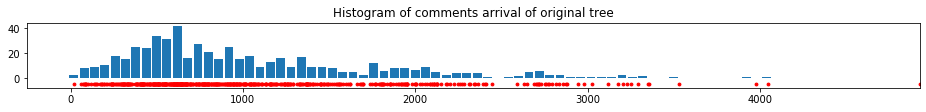

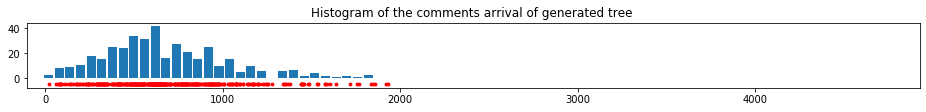

In [81]:
import matplotlib.pyplot as plt
gen_timeseries = hx.get_timeseries_from_tree(gen_tree)
original_timeseries = hx.get_timeseries_from_tree(tree)

max_x = max(max(original_timeseries), max(original_timeseries))

plt.figure(figsize=(16,1.2))
bin_width = 60
linbins = np.arange(min(original_timeseries),max(original_timeseries), bin_width)
hist, bins = np.histogram(original_timeseries, bins = linbins, density = False)
plt.bar(bins[:-1], hist, width=0.85*bin_width, color = "C0")
plt.scatter(original_timeseries, [-max(hist)/10 for i in original_timeseries], marker='o',s=8, color = 'red')
plt.xlim(xmax = max_x)
plt.title("Histogram of comments arrival of original tree")

plt.figure(figsize=(16,1.2))
bin_width = 60
linbins = np.arange(min(gen_timeseries),max(gen_timeseries), bin_width)
hist, bins = np.histogram(gen_timeseries, bins = linbins, density = False)
plt.bar(bins[:-1], hist, width=0.85*bin_width, color = "C0")
plt.scatter(gen_timeseries, [-max(hist)/10 for i in gen_timeseries], marker='o',s=8, color = 'red')
plt.xlim(xmax = max_x)
plt.title("Histogram of the comments arrival of generated tree ")
plt.show()

# Draw network generated

Original tree:
Number of nodes:  567
Not available


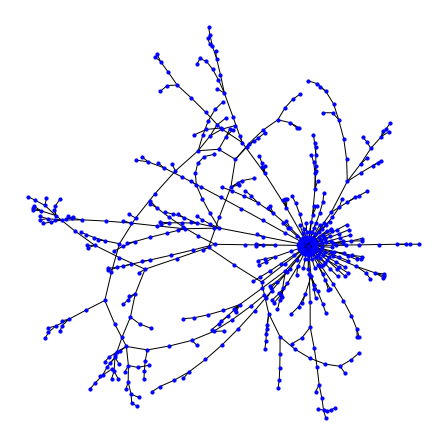

In [82]:
import warnings
warnings.filterwarnings("ignore")
print("Original tree:")
graph_to_draw = tree
n_size = 10

print('Number of nodes: ', nx.number_of_nodes(graph_to_draw))
fig = plt.figure(figsize=(6,6), dpi=72, frameon=False)
pos = nx.spring_layout(graph_to_draw, iterations=2000, k=1.3)
nx.draw(graph_to_draw, pos, node_color='b', node_size=n_size)
# node_labels = nx.get_node_attributes(graph_to_draw, 'id')
# nx.draw_networkx_labels(graph_to_draw, pos, labels = node_labels, font_size=10, 
#                         font_color = 'w', font_weight = 'bold')
plt.show()

Generated tree:
Number of nodes:  401
Not available


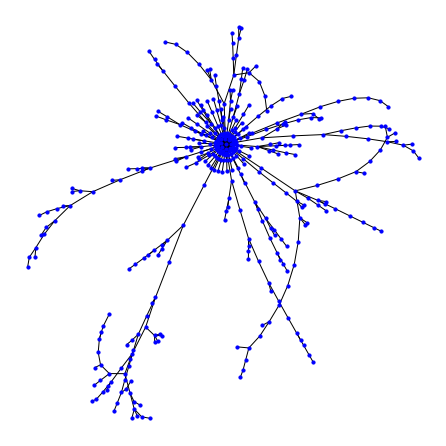

In [83]:
import warnings
print("Generated tree:")
warnings.filterwarnings("ignore")
graph_to_draw = gen_tree
n_size = 10

print('Number of nodes: ', nx.number_of_nodes(graph_to_draw))
fig = plt.figure(figsize=(6,6), dpi=72, frameon=False)
pos = nx.spring_layout(graph_to_draw, iterations=2000, k=1.3)
nx.draw(graph_to_draw, pos, node_color='b', node_size=n_size)
# node_labels = {u:u for u in graph_to_draw.nodes()}
# nx.draw_networkx_labels(graph_to_draw, pos, labels = node_labels, font_size=14, 
#                         font_color = 'black', font_weight = 'normal')
plt.show()

Truncated tree:
Number of nodes:  330
Not available


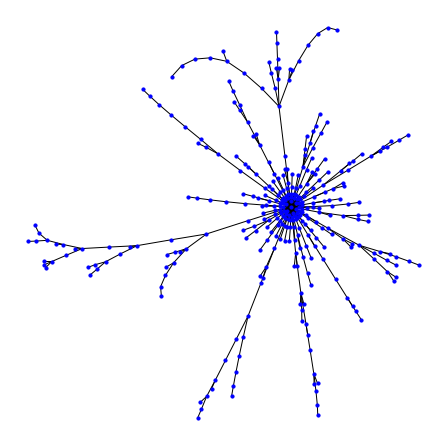

In [84]:
import warnings
warnings.filterwarnings("ignore")
print("Truncated tree:")
graph_to_draw = trunc_tree
n_size = 10

print('Number of nodes: ', nx.number_of_nodes(graph_to_draw))
fig = plt.figure(figsize=(6,6), dpi=72, frameon=False)
pos = nx.spring_layout(graph_to_draw, iterations=2000, k=1.3)
nx.draw(graph_to_draw, pos, node_color='b', node_size=n_size)
node_labels = nx.get_node_attributes(graph_to_draw, 'id')
nx.draw_networkx_labels(graph_to_draw, pos, labels = node_labels, font_size=10, 
                        font_color = 'w', font_weight = 'bold')
plt.show()